# Activity 1- Plotting Data with Moving Average

For this exercise we have acquired a dataset of weather information form Austin Texas and will be looking at the changes in average daily temperature.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Suppress pandas warnings for now
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

Load the dataset into a pandas DataFrame from the csv file

In [2]:
df = pd.read_csv('austin_weather.csv')
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


We only need the Date and TempAvgF columns, remove all others from the dataset

In [3]:
df = df[['Date', 'TempAvgF']]
df.head()

,Date,TempAvgF
0,2013-12-21,60
1,2013-12-22,48
2,2013-12-23,45
3,2013-12-24,46
4,2013-12-25,50


Initially we are only interested in the first years data, thus we need to extract this information.  Create a column in the DataFrame for the Year value and extract the year value as an integer from the strings in the Date column and assign these values to the Year column.

**Note: Temperatures are recorded daily**

In [4]:
df['Year'] = [int(dt[:4]) for dt in df.Date]
df.head()

,Date,TempAvgF,Year
0,2013-12-21,60,2013
1,2013-12-22,48,2013
2,2013-12-23,45,2013
3,2013-12-24,46,2013
4,2013-12-25,50,2013


Repeat this process to extract the month values and store the values as integers in a column Month

In [5]:
df['Month'] = [int(dt[5:7]) for dt in df.Date]
df.head()

,Date,TempAvgF,Year,Month
0,2013-12-21,60,2013,12
1,2013-12-22,48,2013,12
2,2013-12-23,45,2013,12
3,2013-12-24,46,2013,12
4,2013-12-25,50,2013,12


Copy the first year's worth of data to a DataFrame

In [6]:
df_first_year = df[:365]
df_first_year.head()

,Date,TempAvgF,Year,Month
0,2013-12-21,60,2013,12
1,2013-12-22,48,2013,12
2,2013-12-23,45,2013,12
3,2013-12-24,46,2013,12
4,2013-12-25,50,2013,12


Compute a 20 day moving average filter

In [7]:
window = 20
rolling = df_first_year.TempAvgF.rolling(window).mean();
rolling.head(n=20)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19    47.75
Name: TempAvgF, dtype: float64

Plot the raw data and moving average signal, with the x axis the day number in the year

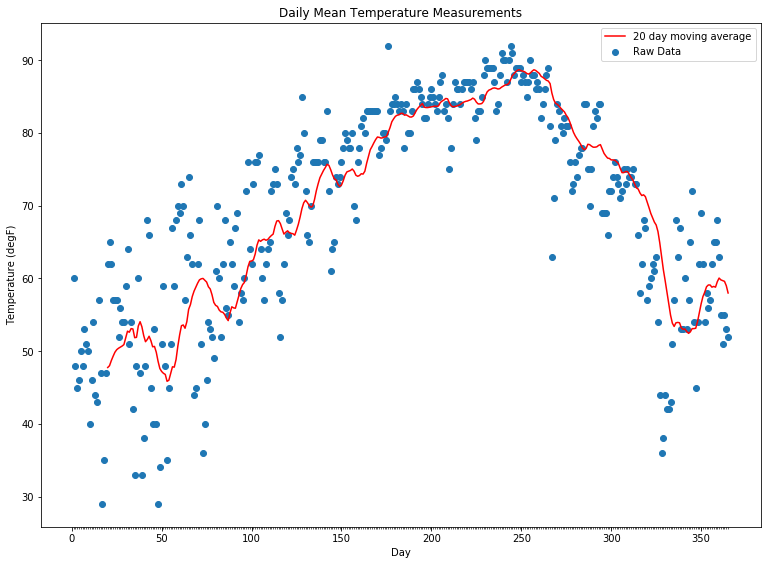

In [8]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);

# Temp measurements
ax.scatter(range(1, 366), df_first_year.TempAvgF, label='Raw Data');
ax.plot(range(1, 366), rolling, c='r', label=f'{window} day moving average');

ax.set_title('Daily Mean Temperature Measurements')
ax.set_xlabel('Day')
ax.set_ylabel('Temperature (degF)')
ax.set_xticks(range(1, 366), 10)
ax.legend();